<a href="https://colab.research.google.com/github/SamanZargarzadeh/Automatic-Image-Tagging-for-Fashion-E-commerce/blob/main/Deep_Learning_Array_to_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [5]:
import pandas as pd
import numpy as np

In [5]:
# load the array 

#train_set_x = np.load('/content/drive/MyDrive/train_set_x.npy')
#test_set_x = np.load('/content/drive/MyDrive/test_set_x.npy')
#cv_set_x = np.load('/content/drive/MyDrive/cv_set_x.npy')

#train_set_y = np.load('/content/drive/MyDrive/train_set_y.npy')
#test_set_y = np.load('/content/drive/MyDrive/test_set_y.npy')
#cv_set_y = np.load('/content/drive/MyDrive/cv_set_y.npy')

In [6]:
# load the array 

train_set_x = np.load('/content/drive/MyDrive/MNIST/train_set_x.npy')
test_set_x = np.load('/content/drive/MyDrive/MNIST/test_set_x.npy')
cv_set_x = np.load('/content/drive/MyDrive/MNIST/cv_set_x.npy')

train_set_y = np.load('/content/drive/MyDrive/MNIST/train_set_y.npy')
test_set_y = np.load('/content/drive/MyDrive/MNIST/test_set_y.npy')
cv_set_y = np.load('/content/drive/MyDrive/MNIST/cv_set_y.npy')

# Tensorflow

In [18]:
#train_set_x=train_set_x.T
#test_set_x=test_set_x.T
#cv_set_x=cv_set_x.T

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from keras.regularizers import l2
from keras.optimizers import Adam



### A Neural Network with two hidden layers.


In [19]:
# Best (0.0013, 31)
n_1=31
alpha= 0.0013
learning_rate = alpha 
lambd=0.1
epochs=10

In [20]:
train_set_y.shape

(10038,)

In [21]:
modelD = Sequential()
modelD.add(Dense(n_1, activation='relu', input_shape=(784,), kernel_regularizer=l2(lambd)))
modelD.add(Dense(4, activation='relu', kernel_regularizer=l2(lambd)))
modelD.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(lambd)))

optimizer = Adam(learning_rate=learning_rate)

modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
historyD = modelD.fit(train_set_x, train_set_y , epochs=epochs)
pd.DataFrame(historyD.history).head()

Epoch 1/10
314/314 [==============================] - 2s 3ms/step - loss: 1.1850 - accuracy: 0.8867
Epoch 2/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5526 - accuracy: 0.9096
Epoch 3/10
314/314 [==============================] - 1s 5ms/step - loss: 0.5406 - accuracy: 0.9116
Epoch 4/10
314/314 [==============================] - 2s 5ms/step - loss: 0.5357 - accuracy: 0.9092
Epoch 5/10
314/314 [==============================] - 2s 5ms/step - loss: 0.5337 - accuracy: 0.9088
Epoch 6/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5293 - accuracy: 0.9091
Epoch 7/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5292 - accuracy: 0.9086
Epoch 8/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5250 - accuracy: 0.9118
Epoch 9/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.9111
Epoch 10/10
314/314 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.9117

,loss,accuracy
0,1.185016,0.886730
1,0.552554,0.909643
2,0.540615,0.911636
3,0.535739,0.909245
4,0.533661,0.908846


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

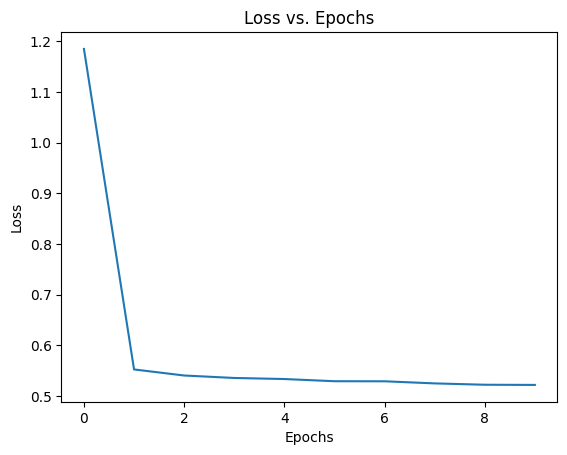

In [22]:
loss_plot = pd.DataFrame(historyD.history).plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

In [23]:
test_loss, test_accuracy = modelD.evaluate(test_set_x, test_set_y)

63/63 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.8930


In [24]:
cv_loss, cv_accuracy = modelD.evaluate(cv_set_x, cv_set_y)

62/62 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.9159


In [25]:
cv_accuracy

0.9159021377563477

In [16]:
comb=[]
for _ in range(20):
  n_1=np.random.randint(2,51)
  alpha=round(10 ** (np.random.uniform(-3,1)),4)
  comb.append((alpha,n_1))

comb

[(0.0547, 22),
 (1.8906, 30),
 (0.0013, 31),
 (0.0153, 3),
 (0.4176, 45),
 (4.4858, 15),
 (3.1376, 12),
 (8.1115, 22),
 (0.0392, 4),
 (0.0639, 49),
 (0.4391, 18),
 (0.0167, 4),
 (0.0038, 23),
 (0.0687, 26),
 (8.0678, 22),
 (0.0841, 49),
 (0.0082, 23),
 (1.9493, 14),
 (6.7985, 15),
 (0.006, 30)]

In [17]:
acc=[]
for i,c in enumerate(comb):

  learning_rate = c[0]
  n_1 = c[1]
  print("###############################################")
  print("combination No. ",i+1)
  print(learning_rate) 
  print(n_1)

  modelD = Sequential()
  modelD.add(Dense(n_1, activation='relu', input_shape=(784,)))
  modelD.add(Dense(4, activation='relu'))
  modelD.add(Dense(1, activation='sigmoid'))

  optimizer = Adam(learning_rate=learning_rate)

  modelD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  historyD = modelD.fit(train_set_x, train_set_y , epochs=10)
  print("*** ACCURACY FOR CV ***") 
  cv_loss, cv_accuracy=modelD.evaluate(cv_set_x, cv_set_y)
  acc.append(round(cv_accuracy*100,2))

###############################################
combination No.  1
0.0547
22
Epoch 1/10
314/314 [==============================] - 2s 4ms/step - loss: 0.7237 - accuracy: 0.5093
Epoch 2/10
314/314 [==============================] - 1s 5ms/step - loss: 0.6941 - accuracy: 0.4938
Epoch 3/10
314/314 [==============================] - 2s 5ms/step - loss: 0.6942 - accuracy: 0.4940
Epoch 4/10
314/314 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5078
Epoch 5/10
314/314 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.4968
Epoch 6/10
314/314 [==============================] - 2s 5ms/step - loss: 0.6940 - accuracy: 0.5042
Epoch 7/10
314/314 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.4916
Epoch 8/10
314/314 [==============================] - 1s 3ms/step - loss: 0.6950 - accuracy: 0.5052
Epoch 9/10
314/314 [==============================] - 1s 3ms/step - loss: 0.6946 - accuracy: 0.4958
Epoch 10/10
314/314 [==

In [18]:
acc

[49.9,
 50.1,
 96.02,
 94.6,
 50.1,
 49.9,
 49.9,
 49.9,
 50.1,
 94.7,
 49.9,
 93.07,
 95.67,
 49.9,
 49.9,
 49.9,
 95.87,
 50.1,
 50.1,
 95.87]